**PARAMETRIC MODELS**

\
Parametric models make specific hypotheses about the relationship between input and output data. These assumptions concern a fixed number of parameters and variables that impact the model’s result. Furthermore, these assumptions are associated with a set of parameters that must be learned during the training process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.isnull().values.any()

True

<Axes: >

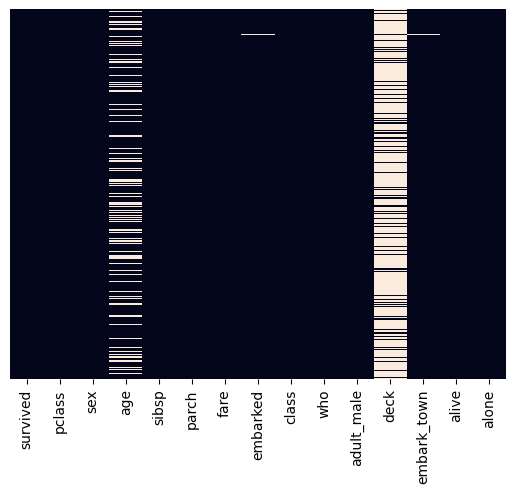

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

**DATA CLEANING**

<Axes: xlabel='pclass', ylabel='age'>

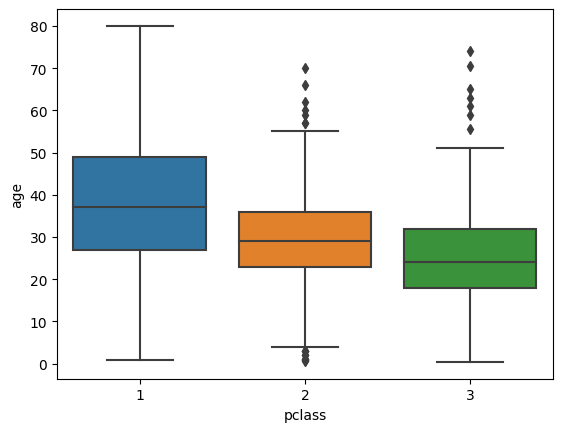

In [6]:
sns.boxplot(x='pclass',y='age',data=data)

In [7]:
m=data.age.isnull()
d = {1: 38, 2: 29, 3: 24}
data.loc[m, 'age'] = data.loc[m, 'pclass'].map(d)

In [8]:
data.drop('deck',axis=1,inplace=True)

In [9]:
data.dropna(inplace=True)

<Axes: >

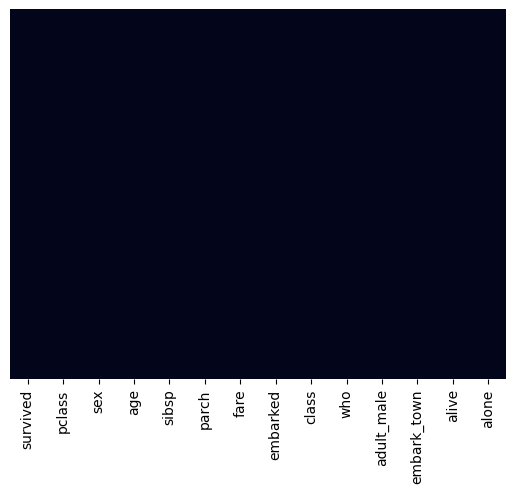

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [11]:
data.isnull().values.any()

False

In [12]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [13]:
data['sex'] = data['sex'].replace("male",0).replace("female",1)

In [14]:
data.drop(['embarked','class','who','adult_male','embark_town','alive','alone'],axis=1,inplace=True)

In [15]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


**TRAINING DATASET**

In [16]:
X = data.drop('survived',axis=1)
Y = data['survived']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**GAUSSIAN NAIVE BAYES CLASSIFIER**

\
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [19]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
GaussianNB()

GaussianNB()

In [20]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [21]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       167
           1       0.72      0.70      0.71       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [22]:
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.7865168539325843


array([[140,  27],
       [ 30,  70]])

**LOGISTIC REGRESSION**

\
Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.Logistic regression is used for solving the classification problems.

In [23]:
model = LogisticRegression ()

In [24]:
model.fit (X_train, y_train)

LogisticRegression()

In [25]:
lr_pred = model.predict (X_test)
lr_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1])

In [26]:
print(classification_report (y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.75      0.73      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267



In [27]:
cm = confusion_matrix(y_test, lr_pred)
print ("Accuracy : ", accuracy_score(y_test, lr_pred))
cm

Accuracy :  0.8089887640449438


array([[143,  24],
       [ 27,  73]])

**LINEAR DISCRIMINANT ANALYSIS**

\
inear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset.LDA assumes that the data has a Gaussian distribution and that the covariance matrices of the different classes are equal. It also assumes that the data is linearly separable, meaning that a linear decision boundary can accurately classify the different classes.

In [28]:
lda = LinearDiscriminantAnalysis()

In [29]:
lda.fit (X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
lda_pred = lda.predict (X_test)
lda_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [31]:
print(classification_report (y_test, lda_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       167
           1       0.72      0.70      0.71       100

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



In [32]:
cm = confusion_matrix(y_test, lda_pred)
print ("Accuracy : ", accuracy_score(y_test, lda_pred))
cm

Accuracy :  0.7865168539325843


array([[140,  27],
       [ 30,  70]])